In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt


In [ ]:
def pro(x,y):
  return(np.matmul(x,y))
def RMSE(y,y_pred):
  s = np.mean(np.square(y-y_pred))
  return(sqrt(s))



In [ ]:
def clean_dataset(Df):
  train = Df.to_numpy()
  x = train[:,1:4]
  m= np.shape(x)[0] #number of training examples
  x = np.concatenate((np.ones((m,1)),x),axis =1) #appending x0 = 1
  n = np.shape(x)[1]
  label = train[:,4] 
  label = label.reshape((m,1)) #column matrix containing the label
  xdash = x
  
  for i in range(1,4):
    for j in range(i,4):
        s = ((xdash[:,i])*(xdash[:,j]))
        cube_term = (s*xdash[:,j])
        s = s.reshape((m,1))
        cube_term = cube_term.reshape((m,1))
        poly = np.concatenate((s,cube_term),axis=1)
        x = np.concatenate((x,poly),axis=1)
  n = np.shape(x)[1]
  for i in range(1,n):
    mean_col = np.mean(x[:,i])
    std_dev_col = np.std(x[:,i])
    x[:,i] = (x[:,i] - mean_col)/std_dev_col
  
  
  return(x,label)




In [20]:
def grad_desc(x,y):
  alpha = 0.01
  num_iter = 1000
  m,n = np.shape(x)
  theta = np.zeros((n,1))
  J_history,x_label =[],[]
  for i in range(num_iter):
    hyp = pro(x,theta)
    J = (1/(2*m))*(np.sum(np.square(hyp-y)))
    J_history.append(J)
    x_label.append(i+1)
    grad = (1/m)*pro(x.T,(hyp-y))
    theta -= alpha*grad
  plt.plot(x_label,J_history)
  return(theta,plt.show())


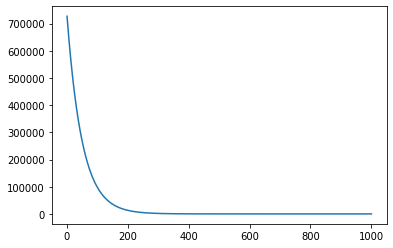

None


In [21]:
Df = pd.read_csv("/content/drive/MyDrive/ML/Polynomial_train.csv")
x, y = clean_dataset(Df)
theta ,t = grad_desc(x,y)
print(t)




In [22]:
test = pd.read_csv("/content/drive/MyDrive/ML/Polynomial_test.csv")
x_test,y_test = clean_dataset(test)
y_pred = pro(x_test,theta)
print(RMSE(y_test,y_pred))


10.848025115526319
